In [19]:
import warnings
warnings.filterwarnings("ignore")

import os
os.system('jupyter trust "{}"'.format('../notebooks/3.3_market_areas_overview.ipynb'))

Signing notebook: ../notebooks/3.3_market_areas_overview.ipynb


0

# Market Areas Overview

*here will be the key conclusions from chapter 3*   
*here will be the decription and visualisation with osm data of every single market area sorted by hierarcy rank*

## Set Up 

Import Libraries 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
from pyproj import CRS
from scipy.stats import norm
from matplotlib.colors import LinearSegmentedColormap
import string
import requests
import time
from shapely.geometry import Polygon
import seaborn as sns
from shapely.geometry import MultiPolygon

Colors

In [3]:
color_palettes = {
    "Mint": ["#EAF4E8", "#C8E0D4", "#A9CCC1", "#8FB9AE", "#76A79D", "#5F968E", "#498581"], 
    "Pi": ["#F8EDEB", "#FAE1DD", "#FCD5CE", "#FEC5BB", "#F8AD9D", "#F4978E", "#F08080"],
    "Or": ["#FFE5D9", "#FFD7BA", "#FEC89A", "#FFB78F", "#F49F7D", "#F28B6D"],
    "MintPi": ["#76A79D", "#8FB9AE", "#A9CCC1", "#C8E0D4", "#FBF0EA", "#FCD5CE", "#FEC5BB", "#F8AD9D", "#F4978E"],
    "MintOr": ["#76A79D", "#8FB9AE", "#A9CCC1", "#C8E0D4", "#FBF0EA", "#FFD7BA", "#FEC89A", "#FFB78F", "#F28B6D"],
    "GrSc":  ["#434343", "#666666", "#999999", "#b7b7b7", "#cccccc", "#d9d9d9", "#efefef", "#f3f3f3", "#ffffff"]
}

cmap_mint = LinearSegmentedColormap.from_list("Mint", color_palettes["Mint"])
cmap_pi = LinearSegmentedColormap.from_list("Pi", color_palettes["Pi"])
cmap_or = LinearSegmentedColormap.from_list("Or", color_palettes["Or"])
cmap_mintpi = LinearSegmentedColormap.from_list("MintPi", color_palettes["MintPi"])
cmap_mintor = LinearSegmentedColormap.from_list("MintOr", color_palettes["MintOr"])
cmap_grsc = LinearSegmentedColormap.from_list("GrSc", color_palettes["GrSc"])

Font

In [4]:
plt.rcParams["font.family"] = "Helvetica"

Berlin Spatial Boundaries

In [5]:
pf = r"../inputs/3.3_market_areas_overview/lor_pgr.gpkg"
pgr = gpd.read_file(pf)
pgr.replace({'-': np.nan, 0: np.nan, '': np.nan}, inplace=True)

bf = r"../inputs/3.3_market_areas_overview/adm_bz.gpkg"
bz = gpd.read_file(bf)
bz.replace({'-': np.nan, 0: np.nan, '': np.nan}, inplace=True)

of = r"../inputs/3.3_market_areas_overview/adm_out.gpkg"
out = gpd.read_file(of)
out.replace({'-': np.nan, 0: np.nan, '': np.nan}, inplace=True)

Data Import

In [6]:
hf = r"../inputs/3.3_market_areas_overview/market_area_central_place_analysis_35_min.gpkg"
market_area = gpd.read_file(hf)

ef = r"../inputs/3.3_market_areas_overview/pbsa_capacity_analysis.gpkg"
pbsa_cap = gpd.read_file(ef)

pf = r"../inputs/3.3_market_areas_overview/central_places.gpkg"
central_places = gpd.read_file(pf)

Data Preparation

In [7]:
colums_to_drop = ['tt_id', 'abr', 'name', '!s_de', '!s_aus', '!s_all', 'lat', 'color','travel_time_min']

market_area = market_area.drop(columns=colums_to_drop)

In [ ]:
market_area = market_area.round(2)

In [9]:
market_area.sort_values(by='cntr_hierarchy_rank', ascending=True, inplace=True) 

In [ ]:
чfig, axs  = plt.subplots(figsize=(12, 12))

pgr.plot(ax=axs, facecolor='none', edgecolor='#cccccc', linewidth=0.5, linestyle="--")
bz.plot(ax=axs, facecolor='none', edgecolor='#999999', linewidth=0.75)
out.plot(ax=axs, facecolor='none', edgecolor='#666666', linewidth=1)
market_area.plot(ax=axs,
          column='cntr_hierarchy_rank',
          cmap=cmap_pi,
          alpha=0.55,
          edgecolor='none',
          linewidth=0.3,
          legend=True,
          legend_kwds={'frameon': False},
          label = 'hierarchy rank', 
          vmin=0,
          vmax=5)

market_area.plot(
    ax=axs,
    edgecolor='white',  # variable for colormap
    facecolor="none",        # transparent polygons  # edge colors from your column
    linewidth=0.3,
    alpha=1
)

central_places.plot(ax=axs,
           color='#76A79D', 
           markersize=20,
           #markersize= 10,
           alpha=0.75,
           edgecolor='white',
           linewidth=1)
for _, row in central_places.iterrows():
    offset = 3  # vertical offset in points
    axs.annotate(
        row['abr'],                           # abbreviation
        xy=(row.geometry.x, row.geometry.y),  # coords from the Point
        xytext=(0, offset),                   # lift the text a bit
        textcoords='offset points',
        color='#1b4332',
        fontsize=8,
        ha='center',
        va='bottom',
        alpha=1,
        zorder=6,
        path_effects=[
            path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()
        ]
    )

axs.set_title('Market Areas Hierarchy Rank', fontsize=16, fontweight='bold')
axs.set_axis_off()
plt.tight_layout()

save_path = os.path.join(hf, "Market Areas Hierarchy Rank.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

# University of Arts Berlin

Рассматриваемая рыночная зона, связанная с University of Arts Berlin, представляет собой один из наиболее ярко выраженных центров высокого порядка в системе студенческого жилья Берлина. Это подтверждается как её функциональной насыщенностью, так и пространственными характеристиками.

University of Arts Market Area (Figure XX) концетнирует в себе 50 обектов студенческого жилья и 48 университетов за счет своей площади в 156 км². 

![University of Arts Berlin](../outputs/3.3_market_areas_overview/1_University_of_the_Arts_Berlin.png) 

*Figure XX. University of Arts Market Area*

TODO: start from here

# Humboldt University of Berlin

*Figure XX. Humboldt University of Berlin Market Area*

# University of Europe for Applied Sciences 

*Figure XX. University of Europe for Applied Sciences Market Area*

# Technical University of Applied Sciences

*Figure XX. Technical University of Applied Sciences Market Area*

# Charité University Hospital

*Figure XX. Charité University Hospital Market Area*

# Archive

In [20]:
import osmnx as ox

market_area.iloc[[1]].explore(color='#f08080', tiles='cartodbpositron')
#pbsa_cap.explore(column='!cap', cmap='Oranges', legend=True, tiles='cartodbpositron')

*Figure XX. bla bla bla*

ferlp


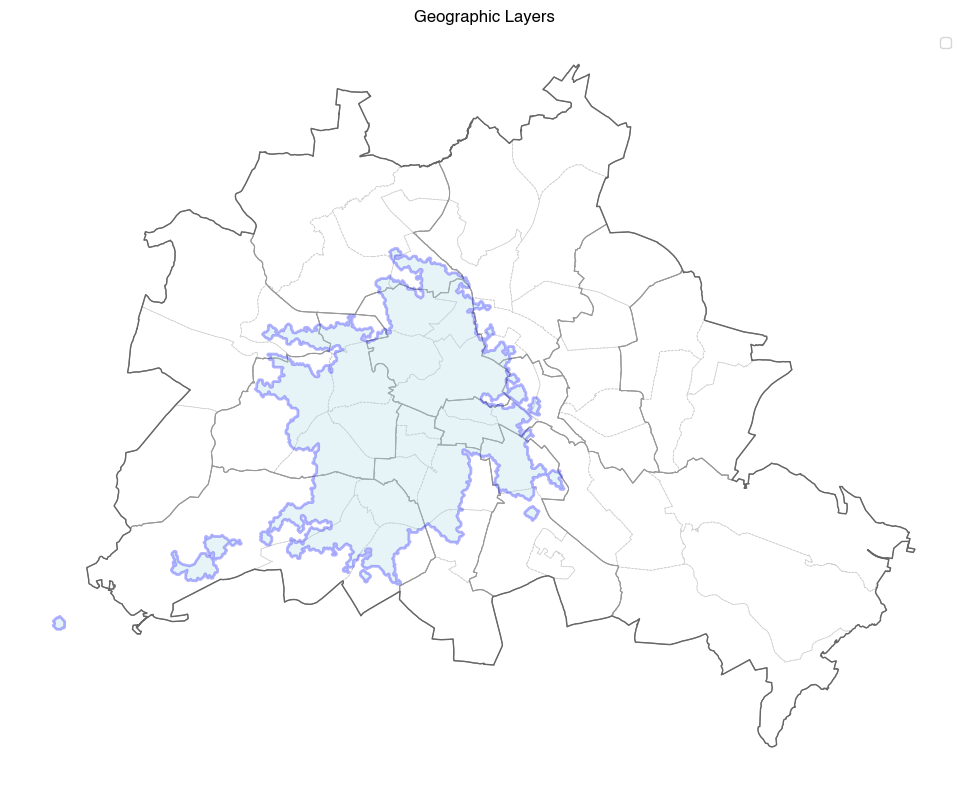

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

pgr.plot(ax=axs, facecolor='none', edgecolor='#cccccc', linewidth=0.5, linestyle="--", label='PGR')
bz.plot(ax=axs, facecolor='none', edgecolor='#999999', linewidth=0.75, label='BZ')
out.plot(ax=axs, facecolor='none', edgecolor='#666666', linewidth=1, label='Out')
market_area.iloc[[0]].plot(ax=axs, facecolor='lightblue', edgecolor='blue', linewidth=2, alpha=0.3, label='Market Area')

axs.set_title('Geographic Layers')
axs.legend()
axs.set_axis_off()
plt.tight_layout()
plt.show()

In [12]:
market_area.iloc[[0]].explore(tiles='openstreetmap')